In [3]:
import pickle
import matplotlib.pyplot as plt

In [4]:
TOTALS = pickle.load(open('../../data/Sex_Postdoctorates.p', 'rb'))
FIELD_TOTALS = pickle.load(open('../../data/Detailed_Sex_RaceEthnicity_Postdoctorates.p', 'rb'))

years = sorted(FIELD_TOTALS.keys())
institutions = sorted(FIELD_TOTALS[ max(years) ].keys())
fields = sorted(FIELD_TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [5]:
def get_field_props(field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = FIELD_TOTALS[year][inst].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            fem_count = field_stats.get('Female', 0)
            if isinstance(fem_count, dict):
                fem_count = fem_count['Total for selected values']
                
            proportions.append(
                fem_count /
                    field_stats['Total for selected values']['Total for selected values']
            )
    return proportions

def get_inst_props(inst='Columbia University in the City of New York'):
    props = []
    for year in years:
        inst_data = TOTALS[year][inst]
        props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

(0, 1)

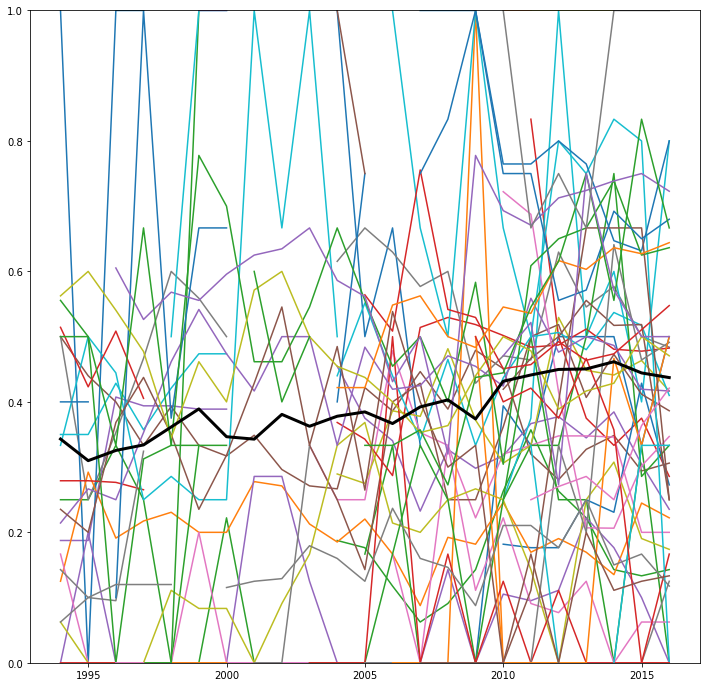

In [6]:
plt.figure(figsize=(12, 12))

for field in fields:
    plt.plot(years, get_field_props(field))
plt.plot(years, get_inst_props(), linewidth=3, color='black')

plt.ylim(bottom=0, top=1)